In [ ]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import date
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, classification_report, confusion_matrix

In [ ]:
#Function for cleaning our data

def preprocess_data(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis='columns', inplace=True)
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    df = df.drop(['SibSp', 'Parch'], axis=1)

    df.Sex.replace(['male', 'female'], [1, 0], inplace=True)
    df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

    # Fill missing values
    df.Age = df.Age.fillna(df.Age.median())
    df.Embarked = df.Embarked.fillna(1)  # Filling with '1' as per your original code
    df.Pclass = df.Pclass.fillna(0)  # Filling with '0' as per your original code

    return df

In [ ]:
# Load the dataset
train_data_path = 'train.csv'                   # Replace with your train data file path
train_data = pd.read_csv(train_data_path)
train_data= preprocess_data(train_data)

In [ ]:
target = 'Survived'
# Split the data into training and test sets
X = train_data.drop(target,axis=1)
y = train_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# **Decision Trees**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
# GridSearchCV for hyperparameter tuning
tree_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_classifier, param_grid, cv=7, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm_DST = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm_DST)

# Calculate  accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:")
print(f"{accuracy:.2f}")

#Calculate Classification report
classification_rep=classification_report(y_test, y_test_pred)
classification_rep_DST = classification_report(y_test, y_test_pred,output_dict=True)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[71  7]
 [17 39]]
Accuracy:
0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        78
           1       0.85      0.70      0.76        56

    accuracy                           0.82       134
   macro avg       0.83      0.80      0.81       134
weighted avg       0.82      0.82      0.82       134



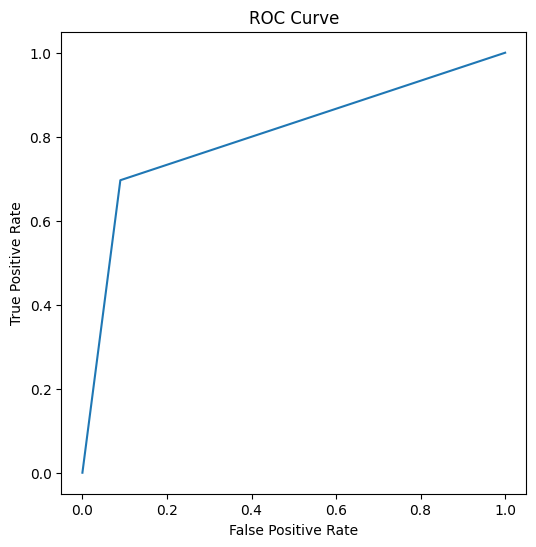

0.8033424908424908

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
# plt.plot([0,1], [0,1], "r--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

roc_auc_score(y_test, y_test_pred)

Text(0.5, 1.0, 'Confusion Matrix')

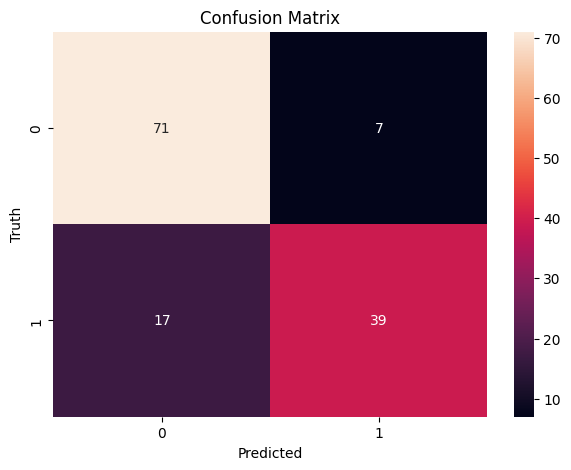

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_DST, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

# **Multi‐Layer Perceptron**

In [ ]:
mlp_model = MLPClassifier(random_state=17)

In [ ]:
model = mlp_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(mlp_model, X, y, cv=5, scoring=scoring)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))

print("-----------------------------------------------------------------------")
# Classification report provides f1, precision, recall, and accuracy values for each class for all models, allowing for a detailed analysis of performance metrics in classification models.
cr_test = classification_report(y_test, y_pred)
classification_rep_MLP = classification_report(y_test, y_pred,output_dict=True)
print(f"Classification Report for Test Set (MLP):\n{cr_test}")

Average Accuracy: 0.82
Average Precision: 0.81
Average Recall: 0.8
Average F1-score: 0.8
-----------------------------------------------------------------------
Classification Report for Test Set (MLP):
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        78
           1       0.74      0.71      0.73        56

    accuracy                           0.78       134
   macro avg       0.77      0.77      0.77       134
weighted avg       0.78      0.78      0.78       134



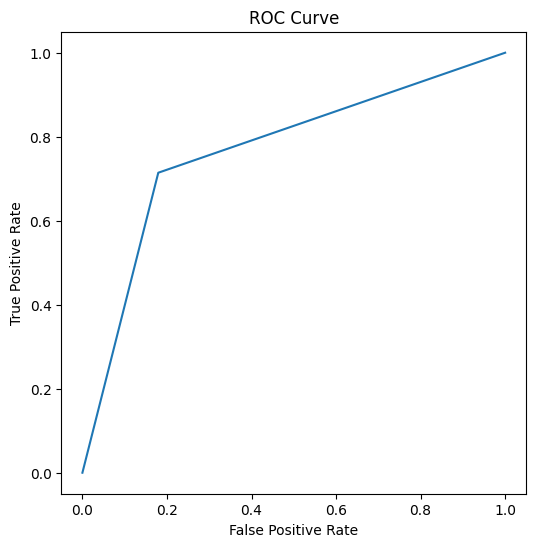

0.7673992673992674

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
# plt.plot([0,1], [0,1], "r--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

roc_auc_score(y_test, y_pred)

Performance Metrics for Test Set (MLP)


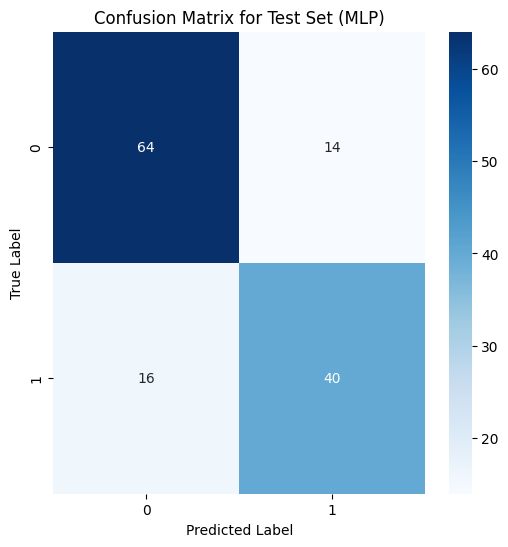

In [ ]:
# Confusion matrix results for the test set
print(f"Performance Metrics for Test Set (MLP)")


cm_test = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set (MLP)')
plt.show()
print("\n")

## **Compare Between Classifiers Score**

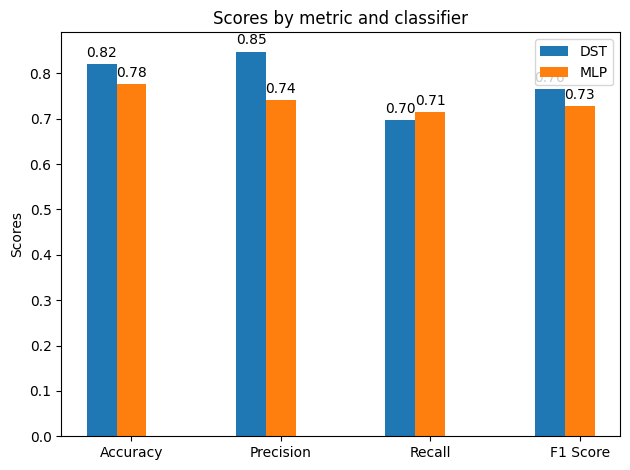

In [ ]:
DST_Metrix = [classification_rep_DST['accuracy'], classification_rep_DST['1']['precision'], classification_rep_DST['1']['recall'], classification_rep_DST['1']['f1-score']]
MLP_Metrix = [classification_rep_MLP['accuracy'], classification_rep_MLP['1']['precision'], classification_rep_MLP['1']['recall'], classification_rep_MLP['1']['f1-score']]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, DST_Metrix, width, label='DST')
rects2 = ax.bar(x, MLP_Metrix, width, label='MLP')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by metric and classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

fig.tight_layout()

plt.show()